 #  A Whale off the Port(folio)
 ---

 In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P TSX 60 Index.

In [1]:
# Initial imports
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path

%matplotlib inline

# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:

* `whale_returns.csv`: Contains returns of some famous "whale" investors' portfolios.

* `algo_returns.csv`: Contains returns from the in-house trading algorithms from Harold's company.

* `sp_tsx_history.csv`: Contains historical closing prices of the S&P TSX 60 Index.

## Whale Returns

Read the Whale Portfolio daily returns and clean the data.

In [2]:
# Reading whale returns
filepath = Path("Resources/whale_returns.csv")
whale_returns_df = pd.read_csv(filepath,parse_dates=True , index_col="Date", infer_datetime_format=True)
whale_returns_df.head(5)

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-02,NaN,NaN,NaN,NaN
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098


In [3]:
# Count nulls
whale_returns_df.isnull().sum()

SOROS FUND MANAGEMENT LLC      1
PAULSON & CO.INC.              1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64

In [4]:
# Drop nulls
whale_returns_df  = whale_returns_df.dropna()
whale_returns_df.isnull().sum()

SOROS FUND MANAGEMENT LLC      0
PAULSON & CO.INC.              0
TIGER GLOBAL MANAGEMENT LLC    0
BERKSHIRE HATHAWAY INC         0
dtype: int64

In [5]:
#cleaned whale_return_df
whale_returns_df.head(5)

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098
2015-03-09,0.000582,0.004225,0.005843,-0.001652


## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data.

In [6]:
# Reading algorithmic returns
filepath = Path("Resources/algo_returns.csv")
algo_returns_df = pd.read_csv(filepath, parse_dates=True, index_col="Date", infer_datetime_format=True)
algo_returns_df.head(5)

,Algo 1,Algo 2
Date,,
2014-05-28,0.001745,NaN
2014-05-29,0.003978,NaN
2014-05-30,0.004464,NaN
2014-06-02,0.005692,NaN
2014-06-03,0.005292,NaN


In [7]:
# Count nulls
algo_returns_df.isnull().sum()


Algo 1    0
Algo 2    6
dtype: int64

In [8]:
# Drop nulls
algo_returns_df = algo_returns_df.dropna()
algo_returns_df.isnull().sum()

Algo 1    0
Algo 2    0
dtype: int64

In [9]:
#cleaned algo_return_df
algo_returns_df.head(5)

,Algo 1,Algo 2
Date,,
2014-06-05,0.004062,0.013285
2014-06-06,0.001857,0.008284
2014-06-09,-0.005012,0.005668
2014-06-10,0.004406,-0.000735
2014-06-11,0.004760,-0.003761


## S&P TSX 60 Returns

Read the S&P TSX 60 historic closing prices and create a new daily returns DataFrame from the data. 

In [10]:
# Reading S&P TSX 60 Closing Prices
# Set "Date" as index and converted it into datatimeformat
filepath = Path("Resources/sp_tsx_history.csv")
sp_tsx_df = pd.read_csv(filepath, parse_dates=True , index_col="Date", infer_datetime_format=True)
sp_tsx_df.head(5)




,Close
Date,
2012-10-01,"$12,370.19"
2012-10-02,"$12,391.23"
2012-10-03,"$12,359.47"
2012-10-04,"$12,447.68"
2012-10-05,"$12,418.99"


In [11]:
# Check Data Types
sp_tsx_df.dtypes


Close    object
dtype: object

In [12]:
# Fix Data Types
#sp_tsx_df["Date"] = pd.to_datetime(sp_tsx_df["Date"])

sp_tsx_df["Close"] = sp_tsx_df["Close"].str.replace("$","")
sp_tsx_df["Close"] = sp_tsx_df["Close"].str.replace(",","")
sp_tsx_df["Close"] = sp_tsx_df["Close"].astype(float)


/var/folders/rn/jmmd9d3x2fq2hs6k6v2ddz380000gn/T/ipykernel_1239/602305756.py:4: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  sp_tsx_df["Close"] = sp_tsx_df["Close"].str.replace("$","")


In [13]:
#data type of Close column was changed to float
sp_tsx_df.dtypes

Close    float64
dtype: object

In [14]:
# Calculate Daily Returns
sp_tsx_returns = sp_tsx_df.pct_change()
sp_tsx_returns.head()

,Close
Date,
2012-10-01,NaN
2012-10-02,0.001701
2012-10-03,-0.002563
2012-10-04,0.007137
2012-10-05,-0.002305


In [15]:
# Drop nulls
sp_tsx_returns = sp_tsx_returns.dropna()
sp_tsx_returns.isnull().sum()  #no null values in dataframe daily_returns

Close    0
dtype: int64

In [16]:
# Rename `Close` Column to be specific to this portfolio.
sp_tsx_returns = sp_tsx_returns.rename(columns={"Close" : "S&P TSX"})
sp_tsx_returns.head(5)

,S&P TSX
Date,
2012-10-02,0.001701
2012-10-03,-0.002563
2012-10-04,0.007137
2012-10-05,-0.002305
2012-10-09,-0.011709


## Combine Whale, Algorithmic, and S&P TSX 60 Returns

In [17]:
# Join Whale Returns, Algorithmic Returns, and the S&P TSX 60 Returns into a single DataFrame with columns for each portfolio's returns.
combined_df = pd.concat([whale_returns_df,algo_returns_df,sp_tsx_returns], axis=1, join="inner")
combined_df.head(5)

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P TSX
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,-0.008530
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.003371
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.001344
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.009972
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,-0.006555


---

# Conduct Quantitative Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance Anlysis

#### Calculate and Plot the daily returns.

<Axes: title={'center': 'Daily Returns'}, xlabel='Date'>

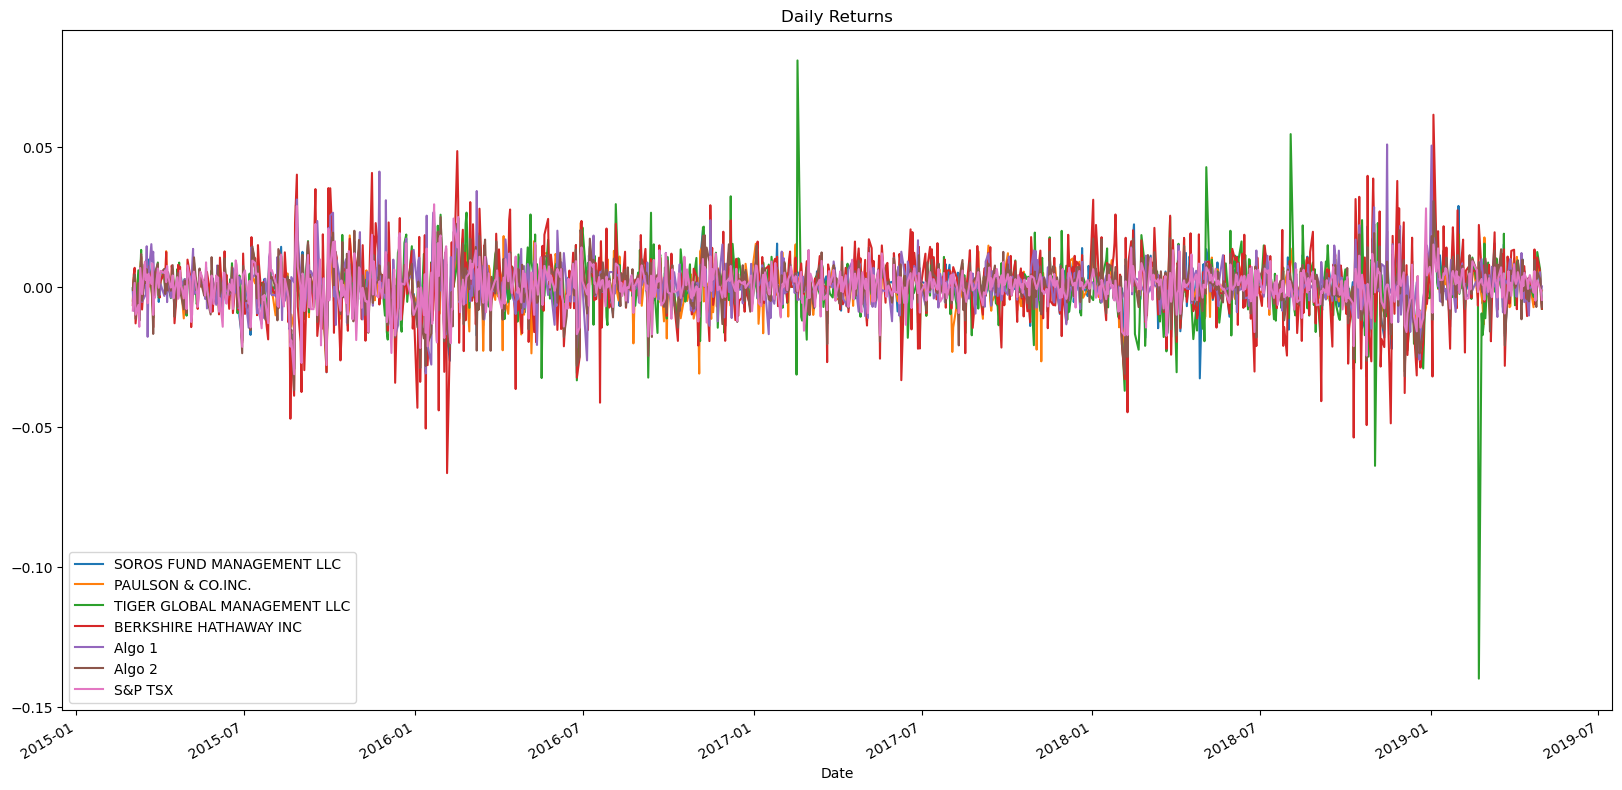

In [18]:
# Plot daily returns of all portfolios
combined_df.plot(figsize=(20,10), title= "Daily Returns")

#### Calculate and Plot cumulative returns.

In [19]:
# Calculate cumulative returns of all portfolios
cumulative_returns = ( 1 + combined_df).cumprod() - 1
cumulative_returns.head(5)



,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P TSX
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,-0.008530
2015-03-04,0.000962,-0.001755,-0.003028,-0.002383,-0.010514,0.001464,-0.011872
2015-03-05,0.004981,0.002314,-0.000681,0.004327,-0.011459,0.005794,-0.010544
2015-03-06,-0.002963,-0.001269,-0.009156,-0.008828,-0.016359,-0.005733,-0.020411
2015-03-09,-0.002383,0.002951,-0.003367,-0.010466,-0.021717,-0.004437,-0.026832


---

<Axes: title={'center': 'Cumulative Returns'}, xlabel='Date'>

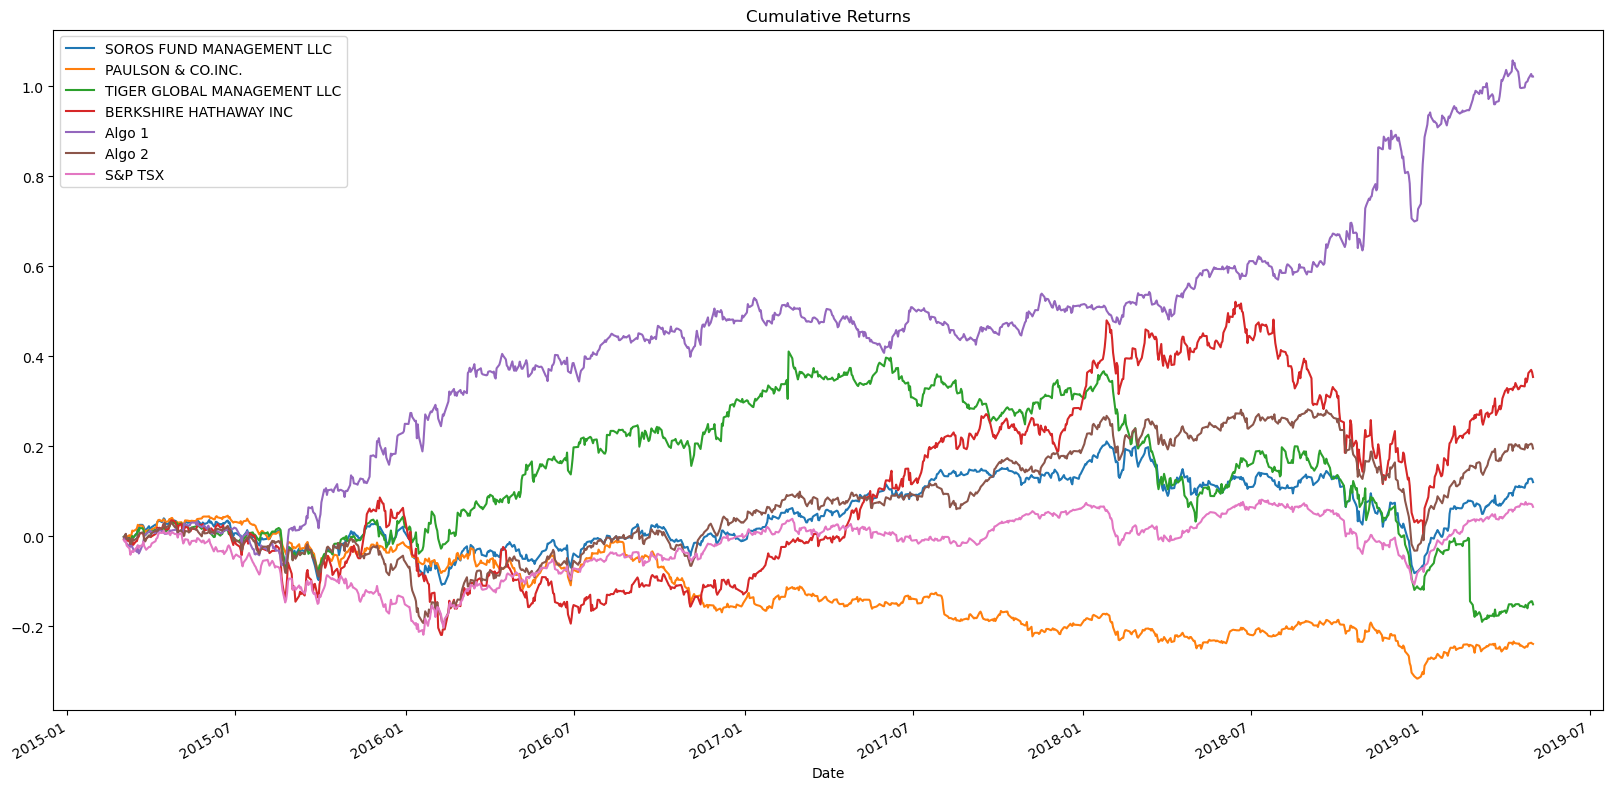

In [20]:
# Plot cumulative returns

cumulative_returns.plot(figsize=(20,10), title= "Cumulative Returns")

## Risk Analysis

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios.
4. Determine which portfolios are riskier than the S&P TSX 60.
5. Calculate the Annualized Standard Deviation.

### Create a box plot for each portfolio


<Axes: title={'center': 'Box Plot'}>

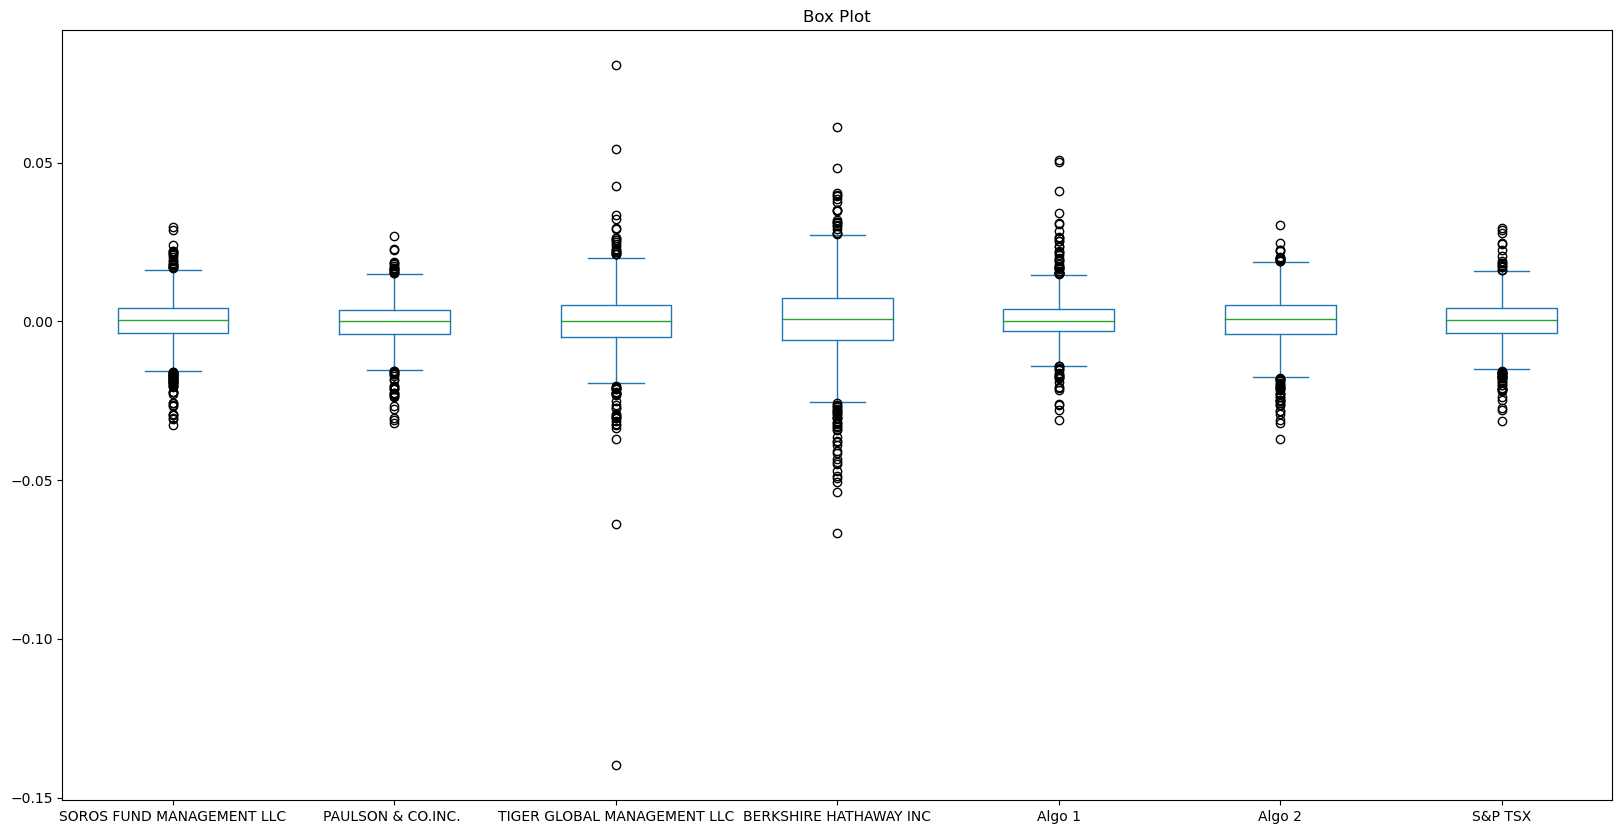

In [21]:
# Box plot to visually show risk
combined_df.plot.box(figsize=(20,10), title = "Box Plot")

### Calculate Standard Deviations

In [22]:
# Calculate the daily standard deviations of all portfolios
combined_df_std = combined_df.std()
combined_df_std.sort_values() # sorted in ascending order

PAULSON & CO.INC.              0.006982
S&P TSX                        0.007034
Algo 1                         0.007589
SOROS FUND MANAGEMENT LLC      0.007828
Algo 2                         0.008326
TIGER GLOBAL MANAGEMENT LLC    0.010883
BERKSHIRE HATHAWAY INC         0.012826
dtype: float64

### Determine which portfolios are riskier than the S&P TSX 60

In [23]:
# Calculate  the daily standard deviation of S&P TSX 60

sp_tsx_std = combined_df["S&P TSX"].std()
sp_tsx_std

0.007034167748577725

In [24]:

# Determine which portfolios are riskier than the S&P TSX 60
combined_df_std > sp_tsx_std
# except for Paulson & Co. Inc. , which has a lower standard deviation than S&P TSX, all other portfolios are riskier than S&P TSX

SOROS FUND MANAGEMENT LLC       True
PAULSON & CO.INC.              False
TIGER GLOBAL MANAGEMENT LLC     True
BERKSHIRE HATHAWAY INC          True
Algo 1                          True
Algo 2                          True
S&P TSX                        False
dtype: bool

### Calculate the Annualized Standard Deviation

In [49]:
# Calculate the annualized standard deviation (252 trading days)
annual_std = combined_df_std * np.sqrt(252) 
annual_std.sort_values()

PAULSON & CO.INC.              0.110841
S&P TSX                        0.111664
Algo 1                         0.120470
SOROS FUND MANAGEMENT LLC      0.124259
Algo 2                         0.132177
TIGER GLOBAL MANAGEMENT LLC    0.172759
BERKSHIRE HATHAWAY INC         0.203599
dtype: float64

---

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Calculate and plot the rolling standard deviation for for all portfolios using a 21-day window.
2. Calculate the correlation between each stock to determine which portfolios may mimick the S&P TSX 60.
3. Choose one portfolio, then calculate and plot the 60-day rolling beta for it and the S&P TSX 60.

### Calculate and plot rolling `std` for all portfolios with 21-day window

In [57]:
# Calculate the rolling standard deviation for all portfolios using a 21-day window
combined_df_21 = combined_df.rolling(window=21).std()
combined_df_21.head(22)




,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P TSX
Date,,,,,,,
2015-03-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-03-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-03-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-03-06,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-03-09,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-03-10,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-03-11,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-03-12,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-03-13,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<Axes: title={'center': 'Rolling Standard Deviation'}, xlabel='Date'>

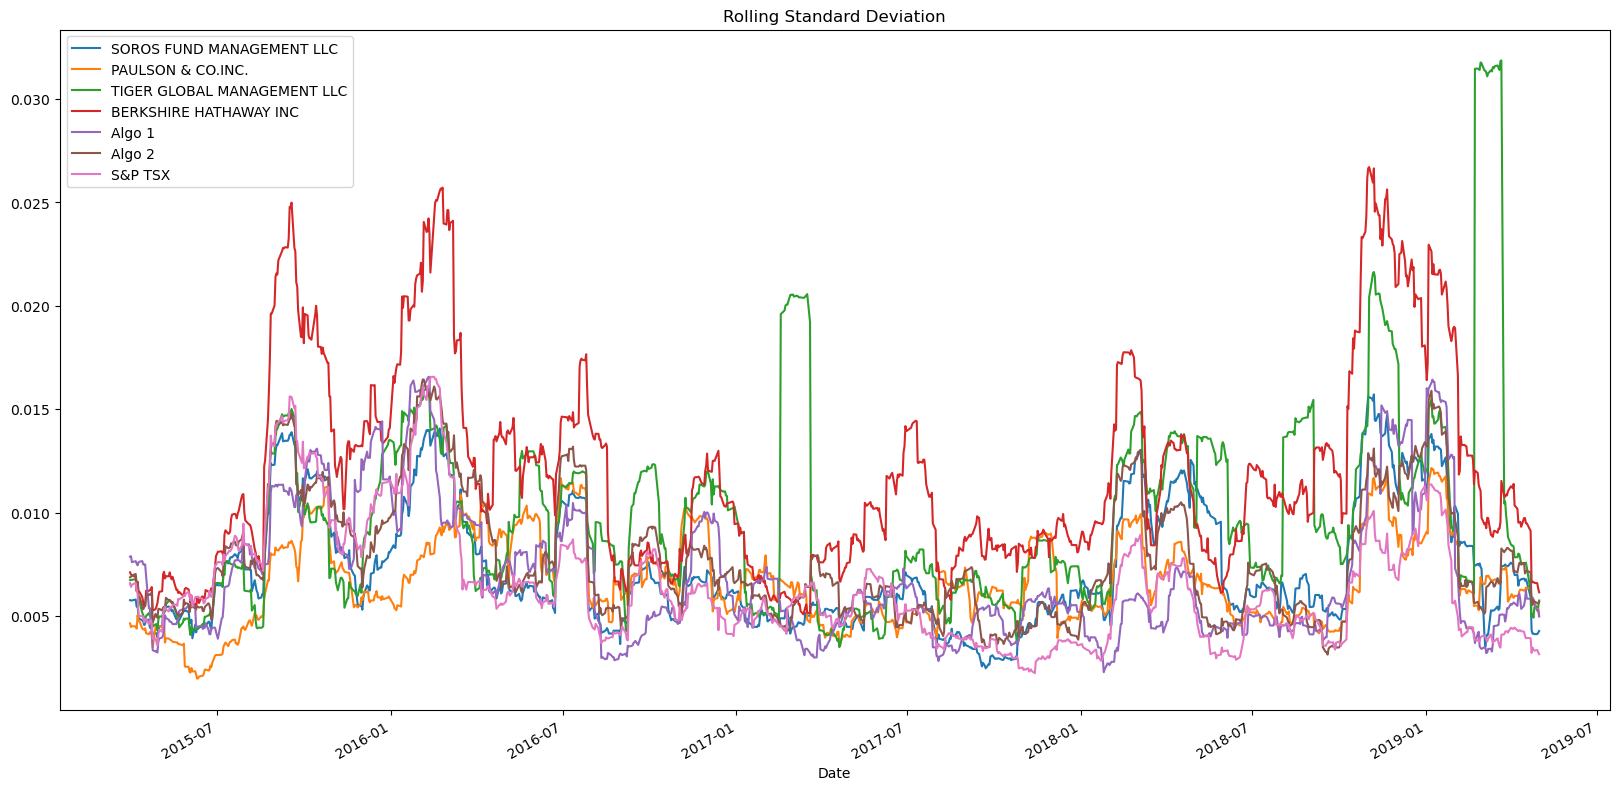

In [58]:
# Plot the rolling standard deviation

combined_df_21.plot(figsize=(20,10), title= "Rolling Standard Deviation")

### Calculate and plot the correlation

In [61]:
# Calculate the correlation
combined_df_corr = combined_df.corr()
# Display de correlation matrix
combined_df_corr

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P TSX
SOROS FUND MANAGEMENT LLC,1.000000,0.697076,0.560964,0.750181,0.313795,0.826667,0.673930
PAULSON & CO.INC.,0.697076,1.000000,0.433034,0.540033,0.266363,0.674015,0.486511
TIGER GLOBAL MANAGEMENT LLC,0.560964,0.433034,1.000000,0.423524,0.161236,0.506689,0.440583
BERKSHIRE HATHAWAY INC,0.750181,0.540033,0.423524,1.000000,0.289378,0.684609,0.557250
Algo 1,0.313795,0.266363,0.161236,0.289378,1.000000,0.285455,0.310276
Algo 2,0.826667,0.674015,0.506689,0.684609,0.285455,1.000000,0.737370
S&P TSX,0.673930,0.486511,0.440583,0.557250,0.310276,0.737370,1.000000


### Calculate and Plot Beta for a chosen portfolio and the S&P 60 TSX

In [86]:
# Calculate covariance of a single portfolio
algo_covariance = combined_df["Algo 1"].cov(combined_df["S&P TSX"])

# Calculate variance of S&P TSX
sp_tsx_variance = combined_df["S&P TSX"].var()

# Computing beta
algo_beta = algo_covariance / sp_tsx_variance
algo_beta



0.33474459081856855

<Axes: title={'center': 'Rolling 30-Day Beta of Algo 1'}, xlabel='Date'>

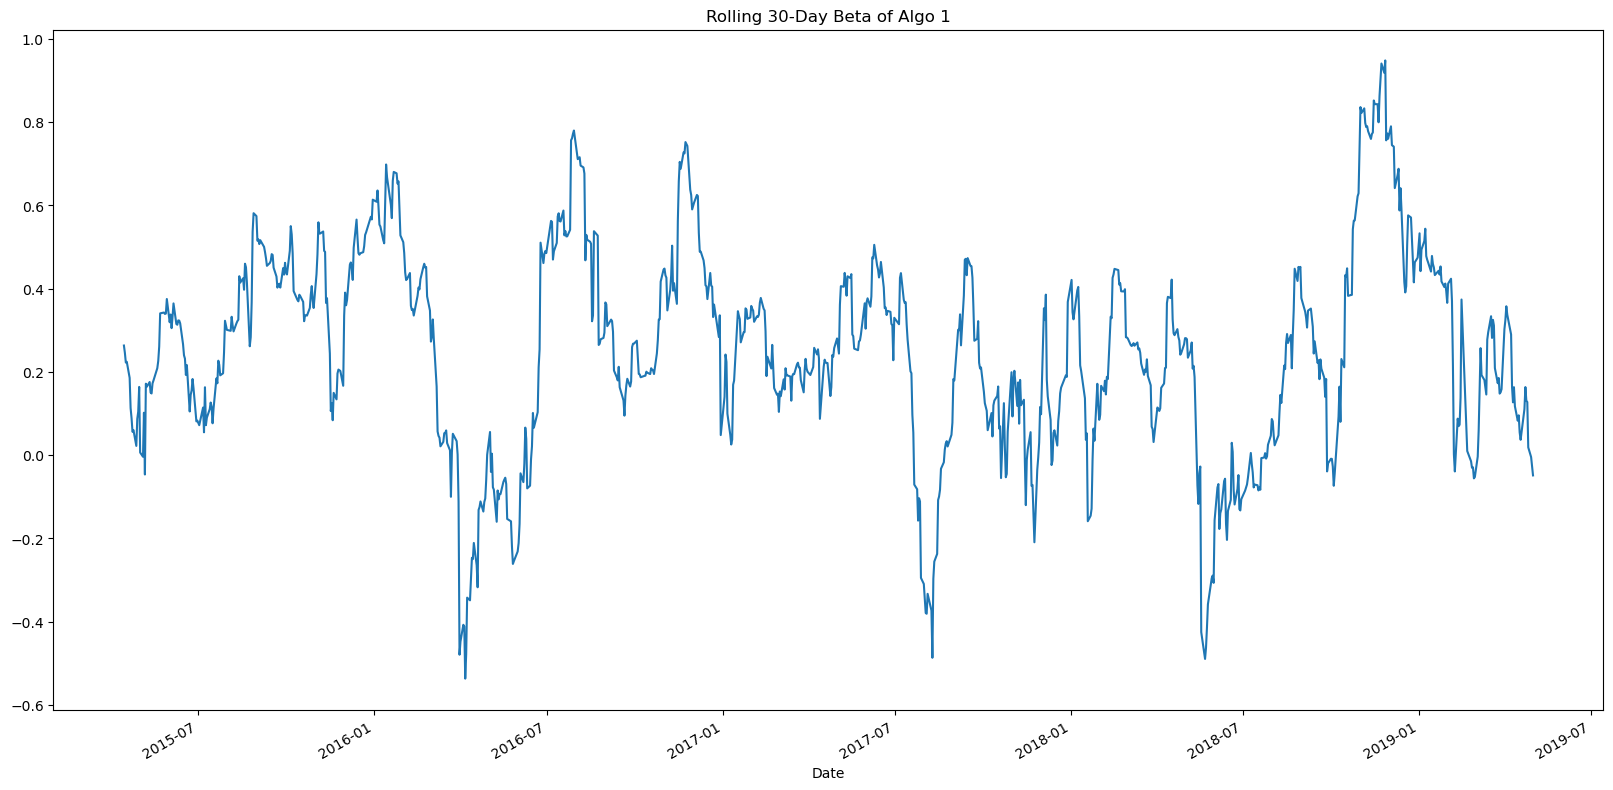

In [91]:
# Plot beta trend
rolling_covariance = combined_df['Algo 1'].rolling(window=30).cov(combined_df['S&P TSX'])
rolling_variance = combined_df['S&P TSX'].rolling(window=30).var()
rolling_beta = rolling_covariance / rolling_variance
rolling_beta.plot(figsize=(20, 10), title='Rolling 30-Day Beta of Algo 1')

## Rolling Statistics Challenge: Exponentially Weighted Average 

An alternative way to calculate a rolling window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the [`ewm`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.ewm.html) with a 21-day half life for each portfolio, using standard deviation (`std`) as the metric of interest.

In [30]:
# Use `ewm` to calculate the rolling window


---

# Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. After all, if you could invest in one of two portfolios, and each offered the same 10% return, yet one offered lower risk, you'd take that one, right?

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [99]:
# Annualized Sharpe Ratios

sharpe_ratios = (combined_df.mean() * 252) / (combined_df_std * np.sqrt(252))
sharpe_ratios



SOROS FUND MANAGEMENT LLC      0.286709
PAULSON & CO.INC.             -0.547594
TIGER GLOBAL MANAGEMENT LLC   -0.144455
BERKSHIRE HATHAWAY INC         0.467045
Algo 1                         1.491514
Algo 2                         0.396817
S&P TSX                        0.195550
dtype: float64

<Axes: title={'center': 'Annualized Sharpe Ratios'}>

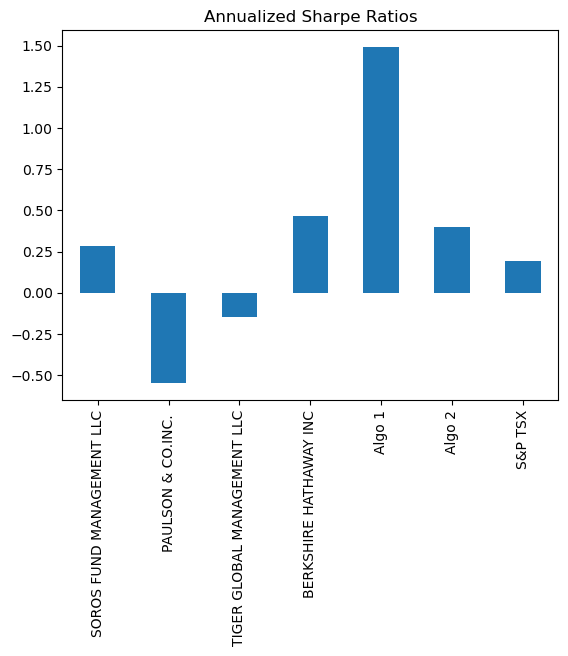

In [96]:
# Visualize the sharpe ratios as a bar plot
sharpe_ratios.plot(kind= "bar", title = "Annualized Sharpe Ratios")

In [103]:
#sorted sharpe ratio for comparison 

sharpe_ratios.sort_values()

PAULSON & CO.INC.             -0.547594
TIGER GLOBAL MANAGEMENT LLC   -0.144455
S&P TSX                        0.195550
SOROS FUND MANAGEMENT LLC      0.286709
Algo 2                         0.396817
BERKSHIRE HATHAWAY INC         0.467045
Algo 1                         1.491514
dtype: float64

### Determine whether the algorithmic strategies outperform both the market (S&P TSX 60) and the whales portfolios.

Both Algo 1 and Algo 2 outperforms S&P TSX. Algo 1 has a sharpe ratio of 1.4915 which is the highest among all the portfolios whereas Algo 2 has a sharpe ratio of 0.3968 which is the 3rd highest just behind Berkshire Hathaway. 

S&P TSX has a positive ratio of 0.1955 but is 5th in the list. 

Berkshire Hatahway has managed to outperform Algo 2 but is way behind Algo 1.

Soros Fund has managed to outperform the market but is still behind algorithmic strategies. 

Paulson & Co. and Tiger Global has negative sharpe ratio and has the worst risk adjusted return. 

Based on the sharpe ratios  above , we can conclude that algorithmic strategies has managed to outperform the market and whale portfolios.  

---

# Create Custom Portfolio

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P TSX 60. 

1. Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.
2. Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock.
3. Join your portfolio returns to the DataFrame that contains all of the portfolio returns.
4. Re-run the performance and risk analysis with your portfolio to see how it compares to the others.
5. Include correlation analysis to determine which stocks (if any) are correlated.

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

In [33]:
# Reading data from 1st stock


In [34]:
# Reading data from 2nd stock


In [35]:
# Reading data from 3rd stock


In [36]:
# Combine all stocks in a single DataFrame


In [37]:
# Reset Date index


In [38]:
# Reorganize portfolio data by having a column per symbol


In [39]:
# Calculate daily returns

# Drop NAs

# Display sample data


## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [40]:
# Set weights
weights = [1/3, 1/3, 1/3]

# Calculate portfolio return

# Display sample data


## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [41]:
# Join your returns DataFrame to the original returns DataFrame


In [42]:
# Only compare dates where return data exists for all the stocks (drop NaNs)


## Re-run the risk analysis with your portfolio to see how it compares to the others

### Calculate the Annualized Standard Deviation

In [43]:
# Calculate the annualized `std`


### Calculate and plot rolling `std` with 21-day window

In [44]:
# Calculate rolling standard deviation

# Plot rolling standard deviation


### Calculate and plot the correlation

In [45]:
# Calculate and plot the correlation


### Calculate and Plot the 60-day Rolling Beta for Your Portfolio compared to the S&P 60 TSX

In [46]:
# Calculate and plot Beta


### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [47]:
# Calculate Annualized Sharpe Ratios


In [48]:
# Visualize the sharpe ratios as a bar plot


### How does your portfolio do?

Write your answer here!